In [9]:
import os
import trompy as tp
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


%run "..//src//vgp_helper_fx_spectral"



In [10]:
ROOT_FOLDER = "D:\\VGP"

DATA_FOLDER = os.path.join(ROOT_FOLDER, "2P\\proc_s2p\\")
BEHAV_FOLDER = os.path.join(ROOT_FOLDER, "Bonsai\\")
METAFILE = os.path.join(ROOT_FOLDER, "Metafile_VGP2.4.xls")
rows, header = tp.metafilereader(METAFILE, sheetname="Analysis_KoolAid")


File is excel file. Making csv metafile first


In [11]:
# Goes through metafile assembling data from s2p files where possible

cell_data={}

for row in rows:
    try:
        key=row[0]+'_'+row[3]
        animal=row[0]
        day=row[2]
        date=int(row[1])
        events=row[6]
#         solution=row[3]
        
        s2p_folder = os.path.join(DATA_FOLDER,
                                  "sub-{}\\ses-{}-{}\\suite2p\\plane0"
                                  .format(animal, day, date))
        events_file =BEHAV_FOLDER+events
        
        
        cell_data[key] = assemble_data(s2p_folder,events_file)
        cell_data[key]['animal'] = row[0]
        cell_data[key]['diet'] = row[11]
        cell_data[key]['session'] = row[3]
        cell_data[key]['solution']=row[5]
        
    except FileNotFoundError:
        print('Cannot find file for', key)
     

Cannot find file for VGP118_K3
Cannot find file for VGP202_K3
Cannot find file for VGP203_K4
Cannot find file for VGP203_K3
Cannot find file for VGP204_K3


In [12]:
mice=[]

for key in cell_data.keys(): 
    d=cell_data[key]
    mouseid=d['animal']
    if mouseid not in mice: mice.append(mouseid)

In [13]:
cell_data['VGP118_K1'].keys()

dict_keys(['animal', 'diet', 'solution', 'raw_F', 'neu_F', 'iscell', 'pump_snips_all', 'pump_responsive', 'lick_snips_all', 'lick_responsive', 'empty_lick_snips_all', 'df_responsive', 'session'])

In [14]:
PR_pro=[]
PR_car=[]

animal=[]
for mouse in mice: 
    temp_PR=[]
    temp_PR2=[]
    
    for key in cell_data.keys():
        d=cell_data[key]
        
        if d['animal']==mouse and d['diet']=='PR' and d['session']=='K1': 
            snips=(np.mean(d['lick_snips_all'][np.where(d['lick_responsive']==1)],axis=1))
            temp_PR.append(np.mean(snips, axis=0))

            
        elif d['animal']==mouse and d['diet']=='PR' and d['session']=='K2': 
            snips=(np.mean(d['lick_snips_all'][np.where(d['lick_responsive']==1)],axis=1))
            temp_PR2.append(np.mean(snips, axis=0))            
            

    if len(temp_PR)>0:
        PR_pro.append(temp_PR)
    if len(temp_PR2)>0:
        PR_car.append(temp_PR2)

               

In [15]:
PR_pp_licks_act=[]
PR_pp_licks_inhib=[]


animal=[]

for key in cell_data.keys():
    d=cell_data[key]
    if d['diet']=='PR' and d['session']=='K1':
        lick_snips=(np.mean(d['lick_snips_all'][np.where(d['lick_responsive']==1)],axis=1)) 
        snips_in=(np.mean(d['lick_snips_all'][np.where(d['lick_responsive']==-1)],axis=1))
        PR_pp_licks_act.append(np.mean(lick_snips, axis=0))
        PR_pp_licks_inhib.append(np.mean(snips_in, axis=0))
        


#Filtering out empty arrays        
PR_pp_licks_inhib_f=[]        
for animal in PR_pp_licks_inhib: 
    if not np.isnan(animal).any(): 
        PR_pp_licks_inhib_f.append(animal)

C:\Users\mko102\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\mko102\Anaconda3\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


In [16]:
PR_cp_licks_act=[]
PR_cp_licks_inhib=[]


animal=[]

for key in cell_data.keys():
    d=cell_data[key]
    if d['diet']=='PR' and d['session']=='K2':
        lick_snips=(np.mean(d['lick_snips_all'][np.where(d['lick_responsive']==1)],axis=1)) 
        snips_in=(np.mean(d['lick_snips_all'][np.where(d['lick_responsive']==-1)],axis=1))
        PR_cp_licks_act.append(np.mean(lick_snips, axis=0))
        PR_cp_licks_inhib.append(np.mean(snips_in, axis=0))

        
#Filtering out empty arrays        
PR_cp_licks_inhib_f=[]        
for animal in PR_cp_licks_inhib: 
    if not np.isnan(animal).any(): 
        PR_cp_licks_inhib_f.append(animal)

In [17]:
NR_pp_licks_act=[]
NR_pp_licks_inhib=[]


animal=[]

for key in cell_data.keys():
    d=cell_data[key]
    if d['diet']=='NR' and d['session']=='K1':
        lick_snips=(np.mean(d['lick_snips_all'][np.where(d['lick_responsive']==1)],axis=1)) 
        snips_in=(np.mean(d['lick_snips_all'][np.where(d['lick_responsive']==-1)],axis=1))
        NR_pp_licks_act.append(np.mean(lick_snips, axis=0))
        NR_pp_licks_inhib.append(np.mean(snips_in, axis=0))
        



In [18]:
NR_cp_licks_act=[]
NR_cp_licks_inhib=[]


animal=[]

for key in cell_data.keys():
    d=cell_data[key]
    if d['diet']=='NR' and d['session']=='K2':
        lick_snips=(np.mean(d['lick_snips_all'][np.where(d['lick_responsive']==1)],axis=1)) 
        snips_in=(np.mean(d['lick_snips_all'][np.where(d['lick_responsive']==-1)],axis=1))
        NR_cp_licks_act.append(np.mean(lick_snips, axis=0))
        NR_cp_licks_inhib.append(np.mean(snips_in, axis=0))
        
        
        


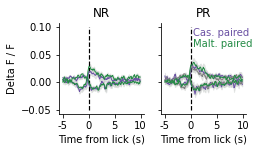

In [19]:
f, ax = plt.subplots(figsize=(4,2),ncols=2, sharey=True)
f.subplots_adjust(wspace=0.2,hspace=0.2, bottom=0.25, left=0.2, right=0.85)


tp.shadedError(ax[0], NR_pp_licks_act, linecolor="#6a51a3")
tp.shadedError(ax[0], NR_pp_licks_inhib, linecolor="#6a51a3")

tp.shadedError(ax[0], NR_cp_licks_act, linecolor="#238b45")
tp.shadedError(ax[0], NR_cp_licks_inhib, linecolor="#238b45")



tp.shadedError(ax[1], PR_pp_licks_act, linecolor="#6a51a3")
tp.shadedError(ax[1], PR_pp_licks_inhib_f, linecolor="#6a51a3")


tp.shadedError(ax[1], NR_cp_licks_act, linecolor="grey")
tp.shadedError(ax[1], NR_cp_licks_inhib, linecolor="grey")

tp.shadedError(ax[1], PR_cp_licks_act, linecolor="#238b45")
tp.shadedError(ax[1], PR_cp_licks_inhib_f, linecolor="#238b45")



ax[1].text(55, 0.085, "Cas. paired", color="#6a51a3")
ax[1].text(55, 0.065, "Malt. paired", color="#238b45")


for axis in ax:
    axis.set_xticks([0,50,100,150])
    axis.set_xticklabels(["-5", "0", "5", "10"],rotation=0)
    axis.set_yticks([-0.05, 0.0, 0.05,0.1])
    axis.spines["top"].set_visible(False)
    axis.spines["right"].set_visible(False)
    axis.vlines([50],-0.05,0.1, color="black", linestyle="--", linewidth=1.2)
    axis.set_xlabel("Time from lick (s)")


ax[0].set_ylabel("Delta F / F")
# ax[0].set_yticklabels([-0.6,-0.4,-0.2, 0.0,0.2, 0.4,0.6], size=12)

ax[0].set_title('NR')
ax[1].set_title('PR')



f.savefig("..//output//licksnips_Koolaid.png")


### making heatmap of all cells 

In [20]:
from itertools import chain

snips_PR_pro=[]
act_PR_pro=[]
in_PR_pro=[]

snips_PR_carb=[]
act_PR_carb=[]
in_PR_carb=[]

snips_NR_pro=[]
act_NR_pro=[]
in_NR_pro=[]

snips_NR_carb=[]
act_NR_carb=[]
in_NR_carb=[]

animal=[]
for key in cell_data.keys():
    d=cell_data[key]
    if d['diet']=='PR' and d['session']=='K1':
        snips=d['lick_snips_all']
        act_snips=d['lick_snips_all'][np.where(d['lick_responsive']==1)]
        in_snips=d['lick_snips_all'][np.where(d['lick_responsive']==-1)]


        for cell in snips:
            snips_PR_pro.append(np.mean(cell, axis=0))
        for cell in act_snips: 
            act_PR_pro.append(np.mean(cell, axis=0))
        for cell in in_snips: 
            in_PR_pro.append(np.mean(cell, axis=0))
            
    elif d['diet']=='PR' and d['session']=='K2':
        snips=d['lick_snips_all']
        act_snips=d['lick_snips_all'][np.where(d['lick_responsive']==1)]
        in_snips=d['lick_snips_all'][np.where(d['lick_responsive']==-1)]


        for cell in snips:
            snips_PR_carb.append(np.mean(cell, axis=0))
        for cell in act_snips: 
            act_PR_carb.append(np.mean(cell, axis=0))
        for cell in in_snips: 
            in_PR_carb.append(np.mean(cell, axis=0))
            
    elif d['diet']=='NR' and d['session']=='K1':
        snips=d['lick_snips_all']
        act_snips=d['lick_snips_all'][np.where(d['lick_responsive']==1)]
        in_snips=d['lick_snips_all'][np.where(d['lick_responsive']==-1)]
        animal.append(d['animal'])


        for cell in snips:
            snips_NR_pro.append(np.mean(cell, axis=0))
        for cell in act_snips: 
            act_NR_pro.append(np.mean(cell, axis=0))
        for cell in in_snips: 
            in_NR_pro.append(np.mean(cell, axis=0))
            
    elif d['diet']=='NR' and d['session']=='K2':
        snips=d['lick_snips_all']
        act_snips=d['lick_snips_all'][np.where(d['lick_responsive']==1)]
        in_snips=d['lick_snips_all'][np.where(d['lick_responsive']==-1)]


        for cell in snips:
            snips_NR_carb.append(np.mean(cell, axis=0))
        for cell in act_snips: 
            act_NR_carb.append(np.mean(cell, axis=0))
        for cell in in_snips: 
            in_NR_carb.append(np.mean(cell, axis=0))

        
        
# len(animal)

In [21]:
from operator import itemgetter

def sort_by_activity(arrays, start_index, end_index):
    subset_mean_sorted = sorted(((np.mean(arr[start_index:end_index]), arr) for arr in arrays), key=itemgetter(0), reverse=True)
    sorted_arrays = [arr for _, arr in subset_mean_sorted]
    return sorted_arrays

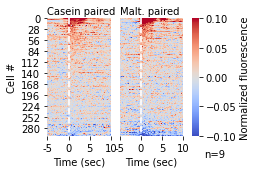

In [22]:
f, ax = plt.subplots(figsize=(3.5,2.4),ncols=3, gridspec_kw={"width_ratios": [1,1,0.1]})
f.subplots_adjust(wspace=0.2,hspace=0.7, bottom=0.2, left=0.2, right=0.80)
cmax=0.10 #Maximum colormap

y1 = sort_by_activity(snips_PR_pro,50,70)

y2 = sort_by_activity(snips_PR_carb,50,70)

sns.heatmap(y1, ax = ax[0],
            cbar_ax=ax[2],
            vmax=cmax, 
            vmin=-cmax,
            cmap=plt.get_cmap('coolwarm'),
            cbar_kws={'label': 'Normalized fluorescence'})

sns.heatmap(y2, ax = ax[1], 
            cbar=False,
            vmax=cmax, 
            vmin=-cmax,
            cmap=plt.get_cmap('coolwarm')
           )



ax[0].text(0,-10, "Casein paired")
ax[0].vlines([50],0,775, color="white", linestyle="--",lw=1.7)

ax[1].text(0,-10, "Malt. paired")
ax[1].vlines([50],0,950, color="white", linestyle="--",lw=1.7)

ax[1].text(200,350, "n=9") #Number of animals

for axis in [ax[0], ax[1]]:
    axis.set_xticks([0,50,100,150])
    axis.set_xlabel("Time (sec)")
    axis.set_xticklabels(["-5", "0", "5", "10"], rotation=0)

ax[0].set_ylabel("Cell #")
ax[1].set_yticks([])
# ax[0].set_yticklabels([0,2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32],size=11)


# ax[2].set_ylabel("Delta F / F", size=12)


f.savefig("..//output//heatmap_allcells_Koolaid_PR.png")

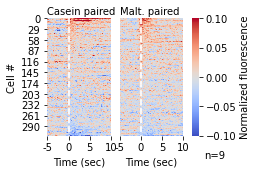

In [23]:
f, ax = plt.subplots(figsize=(3.5,2.4),ncols=3, gridspec_kw={"width_ratios": [1,1,0.1]})
f.subplots_adjust(wspace=0.2,hspace=0.7, bottom=0.2, left=0.2, right=0.80)
cmax=0.10 #Maximum colormap

y1 = sort_by_activity(snips_NR_pro,50,70)

y2 = sort_by_activity(snips_NR_carb,50,70)

sns.heatmap(y1, ax = ax[0],
            cbar_ax=ax[2],
            vmax=cmax, 
            vmin=-cmax,
            cmap=plt.get_cmap('coolwarm'),
            cbar_kws={'label': 'Normalized fluorescence'})

sns.heatmap(y2, ax = ax[1], 
            cbar=False,
            vmax=cmax, 
            vmin=-cmax,
            cmap=plt.get_cmap('coolwarm')
           )



ax[0].text(0,-10, "Casein paired")
ax[0].vlines([50],0,775, color="white", linestyle="--",lw=1.7)

ax[1].text(0,-10, "Malt. paired")
ax[1].vlines([50],0,950, color="white", linestyle="--",lw=1.7)

ax[1].text(200,400, "n=9") #Number of animals

for axis in [ax[0], ax[1]]:
    axis.set_xticks([0,50,100,150])
    axis.set_xlabel("Time (sec)")
    axis.set_xticklabels(["-5", "0", "5", "10"], rotation=0)

ax[0].set_ylabel("Cell #")
ax[1].set_yticks([])
# ax[0].set_yticklabels([0,2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32],size=11)


# ax[2].set_ylabel("Delta F / F", size=12)


f.savefig("..//output//heatmap_allcells_Koolaid_NR.png")

In [24]:
#sorting by activity - PR cas activated
PR_act_pp=sort_by_activity(act_PR_pro,50,70)
PR_in_pp=sort_by_activity(in_PR_pro,50,70)


NR_act_pp=sort_by_activity(act_NR_pro,50,70)
NR_in_pp=sort_by_activity(in_NR_pro,50,70)


Text(19.450000000000003, 0.5, 'Inhibited \n cell#')

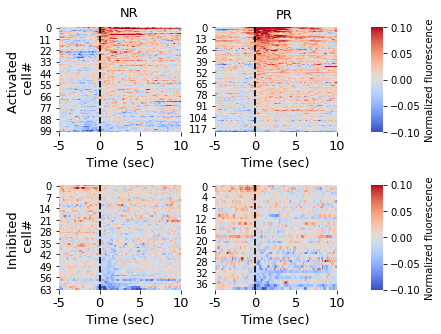

In [25]:
f, ax = plt.subplots(figsize=(6,5),ncols=3,nrows=2 ,gridspec_kw={"width_ratios": [1,1,0.1]})
f.subplots_adjust(wspace=0.4,hspace=0.5, bottom=0.15, left=0.1, right=0.85)
cmax=0.1 #Maximum colormap

y1 = PR_act_pp
y2=NR_act_pp
y3 = PR_in_pp
y4 = NR_in_pp

sns.heatmap(y2, ax = ax[0][0],
            cbar_ax=ax[0][2],
            vmax=cmax, 
            vmin=-cmax,
            cmap=plt.get_cmap('coolwarm'),
            cbar_kws={'label': 'Normalized fluorescence'})

sns.heatmap(y1, ax = ax[0][1],
            cbar=False,
            vmax=cmax, 
            vmin=-cmax,
            cmap=plt.get_cmap('coolwarm'),
            )

sns.heatmap(y4, ax = ax[1][0], 
            cbar_ax=ax[1][2],
            vmax=cmax, 
            vmin=-cmax,
            cmap=plt.get_cmap('coolwarm'),
            cbar_kws={'label': 'Normalized fluorescence'}
           )

sns.heatmap(y3, ax = ax[1][1],
            cbar=False,
            vmax=cmax, 
            vmin=-cmax,
            cmap=plt.get_cmap('coolwarm'),
            )

ax[0][0].text(75,-10, "NR", size=13)

ax[0][1].text(75,-10, "PR", size=13)

for axis in [ax[0][0], ax[0][1], ax[1][0], ax[1][1]]:
    axis.set_xticks([0,50,100,150])
    axis.set_xlabel("Time (sec)", size=13)
    axis.set_xticklabels(["-5", "0", "5", "10"], rotation=0, size=13)
    axis.vlines([50],0,150, color='black', linestyle='--', lw=1.7)

ax[0][0].set_ylabel("Activated \n cell#", size=13)
ax[1][0].set_ylabel("Inhibited \n cell#", size=13)


# f.savefig("..//output//heatmap_allcells_Koolaid.png")

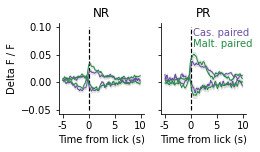

In [27]:
f, ax = plt.subplots(figsize=(4,2),ncols=2, sharey=True)
f.subplots_adjust(wspace=0.2,hspace=0.2, bottom=0.25, left=0.2, right=0.85)


# snips_NR_carb=[]
# act_NR_carb=[]
# in_NR_carb=[]

tp.shadedError(ax[0], act_NR_pro, linecolor="#6a51a3")
tp.shadedError(ax[0], in_NR_pro, linecolor="#6a51a3")

tp.shadedError(ax[0], act_NR_carb, linecolor="#238b45")
tp.shadedError(ax[0], in_NR_carb, linecolor="#238b45")


tp.shadedError(ax[1], act_PR_pro, linecolor="#6a51a3")
tp.shadedError(ax[1], in_PR_pro, linecolor="#6a51a3")


tp.shadedError(ax[1], act_PR_carb, linecolor="#238b45")
tp.shadedError(ax[1], in_PR_carb, linecolor="#238b45")




ax[1].text(55, 0.085, "Cas. paired",color='#6a51a3')
ax[1].text(55, 0.065, "Malt. paired", color="#238b45")


for axis in ax:
    axis.set_xticks([0,50,100,150])
    axis.set_xticklabels(["-5", "0", "5", "10"],rotation=0)
    axis.set_yticks([-0.05, 0.0, 0.05,0.1])
    axis.spines["top"].set_visible(False)
    axis.spines["right"].set_visible(False)
    axis.vlines([50],-0.05,0.1, color="black", linestyle="--", linewidth=1.2)
    axis.set_xlabel("Time from lick (s)")


ax[0].set_ylabel("Delta F / F")
# ax[0].set_yticklabels([-0.6,-0.4,-0.2, 0.0,0.2, 0.4,0.6], size=12)


ax[0].set_title('NR')
ax[1].set_title('PR')


f.savefig("..//output//Singal_Kool-Aid.png")

## Pie Charts

In [129]:
cols = ["data", "pp", 'mp']
df_resp_PR = pd.DataFrame(columns=cols)
df_resp_PR['pp']=len(act_PR_pro),len(in_PR_pro),len(snips_PR_pro)-(len(act_PR_pro)+len(in_PR_pro))
df_resp_PR['mp']=len(act_PR_carb),len(in_PR_carb),len(snips_PR_carb)-(len(act_PR_carb)+len(in_PR_carb))

df_resp_PR['data']='lick_activated', 'lick_inhibited','non-responsive'

df_resp_PR['pp_pct'] = df_resp_PR['pp'] / df_resp_PR['pp'].sum() * 100
df_resp_PR['mp_pct'] = df_resp_PR['mp'] / df_resp_PR['mp'].sum() * 100

# # # Transpose the DataFrame
# df_resp_PR.set_index('data', inplace=True)
# df_resp_PR = df_resp_PR.T


In [130]:
cols = ["data", "pp", 'mp']
df_resp_NR = pd.DataFrame(columns=cols)
df_resp_NR['pp']=len(act_NR_pro),len(in_NR_pro),len(snips_NR_pro)-(len(act_NR_pro)+len(in_NR_pro))
df_resp_NR['mp']=len(act_NR_carb),len(in_NR_carb),len(snips_NR_carb)-(len(act_NR_carb)+len(in_NR_carb))

df_resp_NR['data']='lick_activated', 'lick_inhibited','non-responsive'

df_resp_NR['pp_pct'] = df_resp_NR['pp'] / df_resp_NR['pp'].sum() * 100
df_resp_NR['mp_pct'] = df_resp_NR['mp'] / df_resp_NR['mp'].sum() * 100

# # # Transpose the DataFrame
# df_resp_NR.set_index('data', inplace=True)
# df_resp_NR = df_resp_NR.T


AttributeError: 'DataFrame' object has no attribute 'pp'

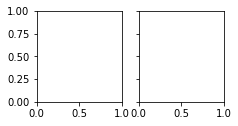

In [32]:
pie_colors = ['#b2df8a','#a6cee3','lightgrey']
labels = ['Act','Inh','Non-resp']

f, [ax1, ax2] = plt.subplots(figsize=(4,2),ncols=2, sharey=True)
f.subplots_adjust(wspace=0.2,hspace=0.2, bottom=0.25, left=0.2, right=0.85)


ax1.pie(df_resp_NR.pp[0:3], labels=labels, autopct='%1.1f%%',
    startangle=90, colors=pie_colors,labeldistance=1.1,textprops={'fontsize': 10})

ax2.pie(df_resp_NR.mp[0:3], labels=labels, autopct='%1.1f%%',
    startangle=90, colors=pie_colors,labeldistance=1.1,textprops={'fontsize': 10})

ax1.set_title("Casein paired" )
ax2.set_title("Malt. paired")

f.savefig("..//output//Pie_Koolaid_NR.png")

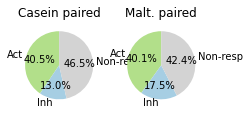

In [162]:
pie_colors = ['#b2df8a','#a6cee3','lightgrey']
labels = ['Act','Inh','Non-resp']

f, [ax1, ax2] = plt.subplots(figsize=(4,2),ncols=2, sharey=True)
f.subplots_adjust(wspace=0.2,hspace=0.2, bottom=0.25, left=0.2, right=0.85)

ax1.pie(df_resp_PR.pp[0:3], labels=labels, autopct='%1.1f%%',
    startangle=90, colors=pie_colors,labeldistance=1.1,textprops={'fontsize': 10})

ax2.pie(df_resp_PR.mp[0:3], labels=labels, autopct='%1.1f%%',
    startangle=90, colors=pie_colors,labeldistance=1.1,textprops={'fontsize': 10})

ax1.set_title("Casein paired")
ax2.set_title("Malt. paired")

f.savefig("..//output//Pie_Kool_aid_PR.png")

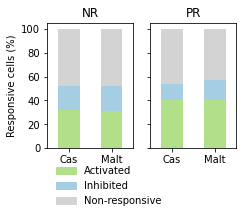

In [33]:
f, ax = plt.subplots(figsize=(3.5,3),ncols=2, sharey=True)
f.subplots_adjust(wspace=0.2,hspace=0.2, bottom=0.3, left=0.2, right=0.95)
colors=['#b2df8a','#a6cee3','lightgrey']

df_resp_NR[2:4].plot(kind='bar', stacked=True, ax=ax[0], color=colors)

df_resp_PR[2:4].plot(kind='bar', stacked=True, ax=ax[1], color=colors)

for axis in ax:
    for p in axis.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
#         axis.annotate(f'{height:.1f}%', (x + width / 2, y + height / 2), ha='center', va='center', fontsize=10, color='white')
        axis.set_xticklabels(['Cas', 'Malt'], rotation=0)
    
ax[1].set_title('PR')
ax[0].set_title('NR')
ax[0].set_yticks([0,20,40,60,80,100])
ax[0].set_yticklabels([0,20,40,60,80,100])
ax[0].set_ylabel("Responsive cells (%)")

# ax[1].set_yticklabels([])
# ax[1].get_legend().remove()
ax[1].get_legend().remove()

colors = {'Activated':'#b2df8a', 'Inhibited':'#a6cee3' , 'Non-responsive': 'Lightgrey'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),0.2,0.2, color=colors[label]) for label in labels]
ax[0].legend(handles, labels, frameon=False,loc='center left', bbox_to_anchor=(0, -0.3))





f.savefig("..//output//Stack_Kool_aid.png")

## PRNR and NRPR

### making heatmap of all cells 

In [91]:
from itertools import chain

snips_PRNR_pro=[]
act_PRNR_pro=[]
in_PRNR_pro=[]

snips_PRNR_carb=[]
act_PRNR_carb=[]
in_PRNR_carb=[]

snips_NRPR_pro=[]
act_NRPR_pro=[]
in_NRPR_pro=[]

snips_NRPR_carb=[]
act_NRPR_carb=[]
in_NRPR_carb=[]

animal=[]
for key in cell_data.keys():
    d=cell_data[key]
    if d['diet']=='PRNR' and d['session']=='K3':
        snips=d['lick_snips_all']
        act_snips=d['lick_snips_all'][np.where(d['lick_responsive']==1)]
        in_snips=d['lick_snips_all'][np.where(d['lick_responsive']==-1)]


        for cell in snips:
            snips_PRNR_pro.append(np.mean(cell, axis=0))
        for cell in act_snips: 
            act_PRNR_pro.append(np.mean(cell, axis=0))
        for cell in in_snips: 
            in_PRNR_pro.append(np.mean(cell, axis=0))
            
    elif d['diet']=='PRNR' and d['session']=='K4':
        snips=d['lick_snips_all']
        act_snips=d['lick_snips_all'][np.where(d['lick_responsive']==1)]
        in_snips=d['lick_snips_all'][np.where(d['lick_responsive']==-1)]


        for cell in snips:
            snips_PRNR_carb.append(np.mean(cell, axis=0))
        for cell in act_snips: 
            act_PRNR_carb.append(np.mean(cell, axis=0))
        for cell in in_snips: 
            in_PRNR_carb.append(np.mean(cell, axis=0))
            
    elif d['diet']=='NRPR' and d['session']=='K3':
        snips=d['lick_snips_all']
        act_snips=d['lick_snips_all'][np.where(d['lick_responsive']==1)]
        in_snips=d['lick_snips_all'][np.where(d['lick_responsive']==-1)]


        for cell in snips:
            snips_NRPR_pro.append(np.mean(cell, axis=0))
        for cell in act_snips: 
            act_NRPR_pro.append(np.mean(cell, axis=0))
        for cell in in_snips: 
            in_NRPR_pro.append(np.mean(cell, axis=0))
            
    elif d['diet']=='NRPR' and d['session']=='K4':
        snips=d['lick_snips_all']
        act_snips=d['lick_snips_all'][np.where(d['lick_responsive']==1)]
        in_snips=d['lick_snips_all'][np.where(d['lick_responsive']==-1)]
        animal.append(d['animal'])



        for cell in snips:
            snips_NRPR_carb.append(np.mean(cell, axis=0))
        for cell in act_snips: 
            act_NRPR_carb.append(np.mean(cell, axis=0))
        for cell in in_snips: 
            in_NRPR_carb.append(np.mean(cell, axis=0))

        
        


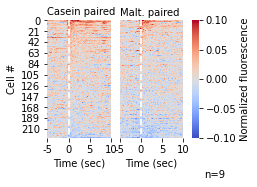

In [92]:
f, ax = plt.subplots(figsize=(3.5,2.4),ncols=3, gridspec_kw={"width_ratios": [1,1,0.1]})
f.subplots_adjust(wspace=0.2,hspace=0.7, bottom=0.2, left=0.2, right=0.80)
cmax=0.10 #Maximum colormap

y1 = sort_by_activity(snips_PRNR_pro,50,70)

y2 = sort_by_activity(snips_PRNR_carb,50,70)

sns.heatmap(y1, ax = ax[0],
            cbar_ax=ax[2],
            vmax=cmax, 
            vmin=-cmax,
            cmap=plt.get_cmap('coolwarm'),
            cbar_kws={'label': 'Normalized fluorescence'})

sns.heatmap(y2, ax = ax[1], 
            cbar=False,
            vmax=cmax, 
            vmin=-cmax,
            cmap=plt.get_cmap('coolwarm')
           )



ax[0].text(0,-10, "Casein paired")
ax[0].vlines([50],0,775, color="white", linestyle="--",lw=1.7)

ax[1].text(0,-10, "Malt. paired")
ax[1].vlines([50],0,950, color="white", linestyle="--",lw=1.7)

ax[1].text(200,350, "n=9") #Number of animals

for axis in [ax[0], ax[1]]:
    axis.set_xticks([0,50,100,150])
    axis.set_xlabel("Time (sec)")
    axis.set_xticklabels(["-5", "0", "5", "10"], rotation=0)

ax[0].set_ylabel("Cell #")
ax[1].set_yticks([])
# ax[0].set_yticklabels([0,2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32],size=11)


# ax[2].set_ylabel("Delta F / F", size=12)


f.savefig("..//output//heatmap_allcells_Koolaid_PRNR.png")

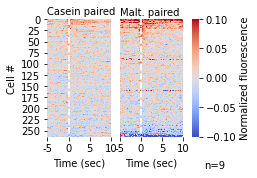

In [93]:
f, ax = plt.subplots(figsize=(3.5,2.4),ncols=3, gridspec_kw={"width_ratios": [1,1,0.1]})
f.subplots_adjust(wspace=0.2,hspace=0.7, bottom=0.2, left=0.2, right=0.80)
cmax=0.10 #Maximum colormap

y1 = sort_by_activity(snips_NRPR_pro,50,70)

y2 = sort_by_activity(snips_NRPR_carb,50,70)

sns.heatmap(y1, ax = ax[0],
            cbar_ax=ax[2],
            vmax=cmax, 
            vmin=-cmax,
            cmap=plt.get_cmap('coolwarm'),
            cbar_kws={'label': 'Normalized fluorescence'})

sns.heatmap(y2, ax = ax[1], 
            cbar=False,
            vmax=cmax, 
            vmin=-cmax,
            cmap=plt.get_cmap('coolwarm')
           )



ax[0].text(0,-10, "Casein paired")
ax[0].vlines([50],0,775, color="white", linestyle="--",lw=1.7)

ax[1].text(0,-10, "Malt. paired")
ax[1].vlines([50],0,950, color="white", linestyle="--",lw=1.7)

ax[1].text(200,400, "n=9") #Number of animals

for axis in [ax[0], ax[1]]:
    axis.set_xticks([0,50,100,150])
    axis.set_xlabel("Time (sec)")
    axis.set_xticklabels(["-5", "0", "5", "10"], rotation=0)

ax[0].set_ylabel("Cell #")
ax[1].set_yticks([])
# ax[0].set_yticklabels([0,2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32],size=11)


# ax[2].set_ylabel("Delta F / F", size=12)


f.savefig("..//output//heatmap_allcells_Koolaid_NRPR.png")

In [94]:
#sorting by activity - PR cas activated
PRNR_act_pp=sort_by_activity(act_PRNR_pro,50,70)
PRNR_in_pp=sort_by_activity(in_PRNR_pro,50,70)


NRPR_act_pp=sort_by_activity(act_NRPR_pro,50,70)
NRPR_in_pp=sort_by_activity(in_NRPR_pro,50,70)


Text(19.450000000000003, 0.5, 'Inhibited \n cell#')

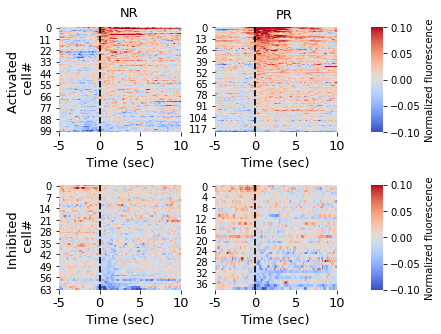

In [95]:
f, ax = plt.subplots(figsize=(6,5),ncols=3,nrows=2 ,gridspec_kw={"width_ratios": [1,1,0.1]})
f.subplots_adjust(wspace=0.4,hspace=0.5, bottom=0.15, left=0.1, right=0.85)
cmax=0.1 #Maximum colormap

y1 = PR_act_pp
y2=NR_act_pp
y3 = PR_in_pp
y4 = NR_in_pp

sns.heatmap(y2, ax = ax[0][0],
            cbar_ax=ax[0][2],
            vmax=cmax, 
            vmin=-cmax,
            cmap=plt.get_cmap('coolwarm'),
            cbar_kws={'label': 'Normalized fluorescence'})

sns.heatmap(y1, ax = ax[0][1],
            cbar=False,
            vmax=cmax, 
            vmin=-cmax,
            cmap=plt.get_cmap('coolwarm'),
            )

sns.heatmap(y4, ax = ax[1][0], 
            cbar_ax=ax[1][2],
            vmax=cmax, 
            vmin=-cmax,
            cmap=plt.get_cmap('coolwarm'),
            cbar_kws={'label': 'Normalized fluorescence'}
           )

sns.heatmap(y3, ax = ax[1][1],
            cbar=False,
            vmax=cmax, 
            vmin=-cmax,
            cmap=plt.get_cmap('coolwarm'),
            )

ax[0][0].text(75,-10, "NR", size=13)

ax[0][1].text(75,-10, "PR", size=13)

for axis in [ax[0][0], ax[0][1], ax[1][0], ax[1][1]]:
    axis.set_xticks([0,50,100,150])
    axis.set_xlabel("Time (sec)", size=13)
    axis.set_xticklabels(["-5", "0", "5", "10"], rotation=0, size=13)
    axis.vlines([50],0,150, color='black', linestyle='--', lw=1.7)

ax[0][0].set_ylabel("Activated \n cell#", size=13)
ax[1][0].set_ylabel("Inhibited \n cell#", size=13)


# f.savefig("..//output//heatmap_allcells_Koolaid.png")

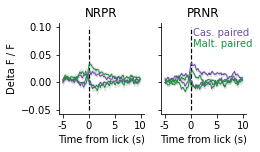

In [96]:
f, ax = plt.subplots(figsize=(4,2),ncols=2, sharey=True)
f.subplots_adjust(wspace=0.2,hspace=0.2, bottom=0.25, left=0.2, right=0.85)


# snips_NR_carb=[]
# act_NR_carb=[]
# in_NR_carb=[]

tp.shadedError(ax[0], act_NRPR_pro, linecolor="#6a51a3")
tp.shadedError(ax[0], in_NRPR_pro, linecolor="#6a51a3")

tp.shadedError(ax[0], act_NRPR_carb, linecolor="#238b45")
tp.shadedError(ax[0], in_NRPR_carb, linecolor="#238b45")


tp.shadedError(ax[1], act_PRNR_pro, linecolor="#6a51a3")
tp.shadedError(ax[1], in_PRNR_pro, linecolor="#6a51a3")


tp.shadedError(ax[1], act_PRNR_carb, linecolor="#238b45")
tp.shadedError(ax[1], in_PRNR_carb, linecolor="#238b45")




ax[1].text(55, 0.085, "Cas. paired",color='#6a51a3')
ax[1].text(55, 0.065, "Malt. paired", color="#238b45")


for axis in ax:
    axis.set_xticks([0,50,100,150])
    axis.set_xticklabels(["-5", "0", "5", "10"],rotation=0)
    axis.set_yticks([-0.05, 0.0, 0.05,0.1])
    axis.spines["top"].set_visible(False)
    axis.spines["right"].set_visible(False)
    axis.vlines([50],-0.05,0.1, color="black", linestyle="--", linewidth=1.2)
    axis.set_xlabel("Time from lick (s)")


ax[0].set_ylabel("Delta F / F")
# ax[0].set_yticklabels([-0.6,-0.4,-0.2, 0.0,0.2, 0.4,0.6], size=12)


ax[0].set_title('NRPR')
ax[1].set_title('PRNR')


f.savefig("..//output//Singal_Kool-Aid_diet2.png")

## Pie Charts

In [142]:
cols = ["data", "pp", 'mp']
df_resp_PRNR = pd.DataFrame(columns=cols)
df_resp_PRNR['pp']=len(act_PRNR_pro),len(in_PRNR_pro),len(snips_PRNR_pro)-(len(act_PRNR_pro)+len(in_PRNR_pro))
df_resp_PRNR['mp']=len(act_PRNR_carb),len(in_PRNR_carb),len(snips_PRNR_carb)-(len(act_PRNR_carb)+len(in_PRNR_carb))

df_resp_PRNR['data']='lick_activated', 'lick_inhibited','non-responsive'

df_resp_PRNR['pp_pct_2'] = df_resp_PRNR['pp'] / df_resp_PRNR['pp'].sum() * 100
df_resp_PRNR['mp_pct_2'] = df_resp_PRNR['mp'] / df_resp_PRNR['mp'].sum() * 100

# # # Transpose the DataFrame
# df_resp_PRNR.set_index('data', inplace=True)
# df_resp_PRNR = df_resp_PRNR.T

# df_resp_PRNR

In [143]:
cols = ["data", "pp", 'mp']
df_resp_NRPR = pd.DataFrame(columns=cols)
df_resp_NRPR['pp']=len(act_NRPR_pro),len(in_NRPR_pro),len(snips_NRPR_pro)-(len(act_NRPR_pro)+len(in_NRPR_pro))
df_resp_NRPR['mp']=len(act_NRPR_carb),len(in_NRPR_carb),len(snips_NRPR_carb)-(len(act_NRPR_carb)+len(in_NRPR_carb))

df_resp_NRPR['data']='lick_activated', 'lick_inhibited','non-responsive'

df_resp_NRPR['pp_pct_2'] = df_resp_NRPR['pp'] / df_resp_NRPR['pp'].sum() * 100
df_resp_NRPR['mp_pct_2'] = df_resp_NRPR['mp'] / df_resp_NRPR['mp'].sum() * 100

# # # Transpose the DataFrame
# df_resp_NRPR.set_index('data', inplace=True)
# df_resp_NRPR = df_resp_NRPR.T


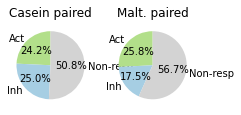

In [107]:
pie_colors = ['#b2df8a','#a6cee3','lightgrey']
labels = ['Act','Inh','Non-resp']

f, [ax1, ax2] = plt.subplots(figsize=(4,2),ncols=2, sharey=True)
f.subplots_adjust(wspace=0.2,hspace=0.2, bottom=0.25, left=0.2, right=0.85)


ax1.pie(df_resp_NRPR.pp[0:3], labels=labels, autopct='%1.1f%%',
    startangle=90, colors=pie_colors,labeldistance=1.1,textprops={'fontsize': 10})

ax2.pie(df_resp_NRPR.mp[0:3], labels=labels, autopct='%1.1f%%',
    startangle=90, colors=pie_colors,labeldistance=1.1,textprops={'fontsize': 10})

ax1.set_title("Casein paired" )
ax2.set_title("Malt. paired")

f.savefig("..//output//Pie_Koolaid_NRPR.png")

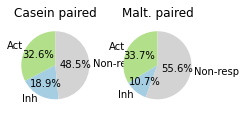

In [108]:
pie_colors = ['#b2df8a','#a6cee3','lightgrey']
labels = ['Act','Inh','Non-resp']

f, [ax1, ax2] = plt.subplots(figsize=(4,2),ncols=2, sharey=True)
f.subplots_adjust(wspace=0.2,hspace=0.2, bottom=0.25, left=0.2, right=0.85)

ax1.pie(df_resp_PRNR.pp[0:3], labels=labels, autopct='%1.1f%%',
    startangle=90, colors=pie_colors,labeldistance=1.1,textprops={'fontsize': 10})

ax2.pie(df_resp_PRNR.mp[0:3], labels=labels, autopct='%1.1f%%',
    startangle=90, colors=pie_colors,labeldistance=1.1,textprops={'fontsize': 10})

ax1.set_title("Casein paired")
ax2.set_title("Malt. paired")

f.savefig("..//output//Pie_Kool_aid_PRNR.png")

In [147]:
cols = ["data", "pp", 'mp']

df_merged_PR = pd.concat([df_resp_PR, df_resp_PRNR], ignore_index=True)

# # Transpose the DataFrame
df_merged_PR.set_index('data', inplace=True)
df_merged_PR = df_merged_PR.T

df_merged_PR

data,lick_activated,lick_inhibited,non-responsive,lick_activated,lick_inhibited,non-responsive
pp,122.000000,39.000000,140.000000,74.000000,43.000000,110.000000
mp,119.000000,52.000000,126.000000,88.000000,28.000000,145.000000
pp_pct,40.531561,12.956811,46.511628,NaN,NaN,NaN
mp_pct,40.067340,17.508418,42.424242,NaN,NaN,NaN
pp_pct_2,NaN,NaN,NaN,32.599119,18.942731,48.458150
mp_pct_2,NaN,NaN,NaN,33.716475,10.727969,55.555556


In [ ]:
f, ax = plt.subplots(figsize=(3.5,3),ncols=2, sharey=True)
f.subplots_adjust(wspace=0.2,hspace=0.2, bottom=0.3, left=0.2, right=0.95)
colors=['#b2df8a','#a6cee3','lightgrey']

df_merged[2:6].plot(kind='bar', stacked=True, ax=ax[0], color=colors)


df_merged_PR[2:6].plot(kind='bar', stacked=True, ax=ax[1], color=colors)

for axis in ax:
    for p in axis.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
#         axis.annotate(f'{height:.1f}%', (x + width / 2, y + height / 2), ha='center', va='center', fontsize=10, color='white')
        axis.set_xticklabels(['Cas', 'Malt', 'Cas', 'Malt'], rotation=0)
        axis.spines["top"].set_visible(False)
        axis.spines["right"].set_visible(False)

    
ax[1].set_title('   PR    PRNR ')
ax[0].set_title('   NR    NRPR ')
ax[0].set_yticks([0,20,40,60,80,100])
ax[0].set_yticklabels([0,20,40,60,80,100])
ax[0].set_ylabel("Responsive cells (%)")

# ax[1].set_yticklabels([])
# ax[1].get_legend().remove()
ax[1].get_legend().remove()

colors = {'Activated':'#b2df8a', 'Inhibited':'#a6cee3' , 'Non-responsive': 'Lightgrey'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),0.2,0.2, color=colors[label]) for label in labels]
ax[0].legend(handles, labels, frameon=False,loc='center left', bbox_to_anchor=(0, -0.35))


ax[0].spines["top"].set_visible(False)



f.savefig("..//output//Stack_Kool_aid_diet2.png")

In [65]:
# cols = ["animal", "diet", "session","solution", "lick_activated"]
# df_activated = pd.DataFrame(columns=cols)

# for key, d in cell_data.items():
#     percent_act = d["df_responsive"].loc["lick_all", "responsive"] / np.sum(d["df_responsive"].loc['pump_only':'neither',"activated"]) * 100
#     data = np.array([d["animal"], d["diet"], d["session"], d["solution"],percent_act])
#     df_temp = pd.DataFrame({col: value for col, value in zip(cols, data)},
#                           index=[key.split("_")[0]]).astype({'lick_activated':'float'})
    

#     df_activated = pd.concat([df_activated, df_temp])
# df_activated


In [66]:
# df_pref = (df_activated.pivot_table(index=["animal", "diet"],
#                          columns=["session"],
#                          values="lick_activated",
#                          aggfunc="mean")
#              .astype({"K1": "float", "K2": "float"})
# #              .assign(pref=lambda df_: df_.cas / (df_.cas + df_.malt))
#              .assign(pref1=lambda df_: df_.K1 - df_.K2)
# #            .assign(pref2=lambda df_: df_.C6 - df_.M6)

           
#             )
# df_pref

Dataframes for each group (NR and PR) Casein and maltodextrin activated cells

In [67]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Making dataframe for NR-NRPR group
# df_NR_cas = (df_pref
#  .reset_index()
#  .pivot_table(index="animal",
#               columns="diet",
#               values="K1")
# #  .fillna(0)
#  .assign(NR=lambda df_:df_.NR,)
#  .drop(columns=["PR", "PRNR", 'NRPR'])
#  .dropna()
# )

# df_NR_malt = (df_pref
#  .reset_index()
#  .pivot_table(index="animal",
#               columns="diet",
#               values="K2")
# #  .fillna(0)
#  .assign(NR=lambda df_:df_.NR,)
#  .drop(columns=["PR", "PRNR", "NRPR"])
#  .dropna()
# )

# # Making dataframe for PR-PRNR group
# df_PR_cas = (df_pref
#  .reset_index()
#  .pivot_table(index="animal",
#               columns="diet",
#               values="K1")
# #  .fillna(0)
#  .assign(PR=lambda df_:df_.PR,)
#  .drop(columns=["NR", "NRPR" ,"PRNR"])
#  .dropna()
# )

# df_PR_malt = (df_pref
#  .reset_index()
#  .pivot_table(index="animal",
#               columns="diet",
#               values="K2")
# #  .fillna(0)
#  .assign(PR=lambda df_:df_.PR,)
#  .drop(columns=["NR", "NRPR", "PRNR"])
#  .dropna()
# )



Figure for cells activated by casein and maltodextrin

In [68]:
# NR_cas=[]
# NRPR_cas=[]
# for row in df_NR_cas.iterrows():
#     NR_cas.append(row[1].NR)
#     NRPR_cas.append(row[1].NRPR)

# NR_malt=[]
# NRPR_malt=[]
# for row in df_NR_malt.iterrows():
#     NR_malt.append(row[1].NR)
#     NRPR_malt.append(row[1].NRPR)
    
    
# PR_cas=[]
# PRNR_cas=[]
# for row in df_PR_cas.iterrows():
#     PR_cas.append(row[1].PR)
#     PRNR_cas.append(row[1].PRNR)

# PR_malt=[]
# PRNR_malt=[]
# for row in df_PR_malt.iterrows():
#     PR_malt.append(row[1].PR)
#     PRNR_malt.append(row[1].PRNR)

    

# colors_1=['#af8dc3', '#762a83','#762a83','#af8dc3']
# colors_M=['#7fbf7b', '#1b7837','#1b7837','#7fbf7b']


# f,ax=plt.subplots(figsize=(4.5,5), ncols=1, nrows=2, sharey='row')
# f.subplots_adjust(wspace=0.15,hspace=0.5, bottom=0.05, left=0.25)

# tp.barscatter([[NR_cas,NRPR_cas],[PR_cas,PRNR_cas]], 
#               paired= True,
#               barfacecolor=colors_1,
#               barfacecolor_option="individual",
#               barlabels=['NR', 'NRPR', 'PR', 'PRNR'],
#               fontsize = 13,
#               scattersize=110,
#               scatteralpha=0.9,
#               spaced=True,
#               linewidth=1.5,
#               ax=ax[0],
#               show_legend=False)

# tp.barscatter([[NR_malt,NRPR_malt],[PR_malt,PRNR_malt]], 
#               paired= True,
#               barfacecolor=colors_M,
#               barfacecolor_option="individual",
#               barlabels=['NR', 'NRPR', 'PR', 'PRNR'],
#               fontsize = 13,
#               scattersize=110,
#               scatteralpha=0.9,
#               spaced=True,
#               linewidth=1.5,
#               ax=ax[1],
#               show_legend=False)

# ax[0].set_ylabel('Lick responsive cells (%)',fontsize = 13)
# ax[0].set_yticks([0,20,40,60,80])
# ax[0].set_yticklabels([0,20,40,60,80], fontsize = 13)

# ax[1].set_ylabel('Lick responsive cells (%)',fontsize = 13)
# ax[1].set_yticks([0,20,40,60,80])
# ax[1].set_yticklabels([0,20,40,60,80], fontsize = 13)


# ax[0].set_title('Casein', fontsize =15)
# ax[1].set_title('Maltodextrin', fontsize =15)

# f.savefig('C:\\Users\\mko102\\GitHub\\VGP\\output\\%_lick_activated_cells.png')

Dataframes for each group (NR and PR) Preferense

In [69]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Making dataframe for NR-NRPR group
# df_NR = (df_pref
#  .reset_index()
#  .pivot_table(index="animal",
#               columns="diet",
#               values="pref1")
# #  .fillna(0)
#  .assign(NR=lambda df_:df_.NR)
#  .drop(columns=["PR"])
#  .dropna()
# )

# df_NRPR = (df_pref
#  .reset_index()
#  .pivot_table(index="animal",
#               columns="diet",
#               values="pref2")
# #  .fillna(0)
#  .assign(NRPR=lambda df_:df_.NRPR)
#  .drop(columns=["PRNR"])
#  .dropna()
# )

# # Making dataframe for PR-PRNR group
# df_PR = (df_pref
#  .reset_index()
#  .pivot_table(index="animal",
#               columns="diet",
#               values="pref1")
# #  .fillna(0)
#  .assign(PR=lambda df_:df_.PR)
#  .drop(columns=["NR"])
#  .dropna()
# )


# df_PRNR = (df_pref
#  .reset_index()
#  .pivot_table(index="animal",
#               columns="diet",
#               values="pref2")
# #  .fillna(0)
#  .assign(PRNR=lambda df_:df_.PRNR)
#  .drop(columns=["NRPR"])
#  .dropna()
# )
# # print(df_NR)
# # print(df_PR)


# pref_NR=[]
# for row in df_NR.iterrows():
#     pref_NR.append(row[1].NR)
    
# pref_PR=[]
# for row in df_PR.iterrows():
#     pref_PR.append(row[1].PR)

    
# pref_NRPR=[]
# for row in df_NRPR.iterrows():
#     pref_NRPR.append(row[1].NRPR)
    
# pref_PRNR=[]
# for row in df_PRNR.iterrows():
#     pref_PRNR.append(row[1].PRNR)
    

Figure for proportion of cells activated by casin - malodextrin

In [70]:
# f, ax = plt.subplots(figsize=(4,4))
# f.subplots_adjust(wspace=0.15,hspace=0.35, bottom=0.15, left=0.3)


# x1 = [1,2]
# x2=[3,4]

# for row in zip(pref_NR,pref_NRPR):
#     y=row
#     ax.plot(x1, y, color="grey")
#     ax.scatter(x1, y, s=150, color=["#af8dc3", "#762a83"], zorder=20, alpha=0.8)

# for row in zip(pref_PR,pref_PRNR):
#     y=row
#     ax.plot(x2, y, color="grey")
#     ax.scatter(x2, y, s=150, color=["#762a83", "#af8dc3"], zorder=20, alpha=0.8)

  
    
# ax.bar(x1, [np.mean(pref_NR),np.mean(pref_NRPR)], width=0.7, zorder=-1, color="lightgrey")
# ax.bar(x2, [np.mean(pref_PR),np.mean(pref_PRNR)], width=0.7, zorder=-1, color="lightgrey")
    
# ax.set_ylabel("Proportion of cells responsive \n to casein vs maltodextrin", size=13)
# ax.set_yticks([-40,-20,0,20,40])
# ax.set_yticklabels(['-40','-20','0','20','40'], size=13)

# ax.set_xticks([1,2,3,4])
# ax.set_xticklabels(["NR", 'NRPR','PR','PRNR'], size=13)
# ax.set_xlim([0.4,4.6])

# ax.axhline(0, color="k", linestyle="--", zorder=-1,lw=1.2)

# ax.spines["top"].set_visible(False)
# ax.spines["right"].set_visible(False)

# f.savefig('C:\\Users\\mko102\\GitHub\\VGP\\output\\pref_casein_cells.png')

In [71]:
# PR_C1_lick=[]
# PR_C2_lick=[]
# PR_C3_lick=[]

# PR_M1_lick=[]
# PR_M2_lick=[]
# PR_M3_lick=[]
# animal=[]

# for key in cell_data.keys():
#     d=cell_data[key]
#     if d['diet']=='PR' and d['session']=='C1':
#         PR_C1_lick.append((len(d['lick_responsive'][np.where(d['lick_responsive']==1)])+(len(d['lick_responsive'][np.where(d['lick_responsive']==-1)])))/len(d['lick_responsive'])*100)

#     elif d['diet']=='PR' and d['session']=='C2':
#         PR_C2_lick.append((len(d['lick_responsive'][np.where(d['lick_responsive']==1)])+(len(d['lick_responsive'][np.where(d['lick_responsive']==-1)])))/len(d['lick_responsive'])*100)
#     elif d['diet']=='PR' and d['session']=='C3':
#         PR_C3_lick.append((len(d['lick_responsive'][np.where(d['lick_responsive']==1)])+(len(d['lick_responsive'][np.where(d['lick_responsive']==-1)])))/len(d['lick_responsive'])*100)
            
        
#     elif d['diet']=='PR'and d['session']=='M1':
#         PR_M1_lick.append((len(d['lick_responsive'][np.where(d['lick_responsive']==1)])+(len(d['lick_responsive'][np.where(d['lick_responsive']==-1)])))/len(d['lick_responsive'])*100)
#     elif d['diet']=='PR'and d['session']=='M2':
#         PR_M2_lick.append((len(d['lick_responsive'][np.where(d['lick_responsive']==1)])+(len(d['lick_responsive'][np.where(d['lick_responsive']==-1)])))/len(d['lick_responsive'])*100)
#     elif d['diet']=='PR'and d['session']=='M3':
#         PR_M3_lick.append((len(d['lick_responsive'][np.where(d['lick_responsive']==1)])+(len(d['lick_responsive'][np.where(d['lick_responsive']==-1)])))/len(d['lick_responsive'])*100)


# len(PR_C3_lick)

In [72]:
# PRNR_C4_lick=[]
# PRNR_C5_lick=[]
# PRNR_C6_lick=[]

# PRNR_M4_lick=[]
# PRNR_M5_lick=[]
# PRNR_M6_lick=[]
# animal=[]

# for key in cell_data.keys():
#     d=cell_data[key]
#     if d['diet']=='PRNR' and d['session']=='C4':
#         PRNR_C4_lick.append((len(d['lick_responsive'][np.where(d['lick_responsive']==1)])+(len(d['lick_responsive'][np.where(d['lick_responsive']==-1)])))/len(d['lick_responsive'])*100)

#     elif d['diet']=='PRNR' and d['session']=='C5':
#         PRNR_C5_lick.append((len(d['lick_responsive'][np.where(d['lick_responsive']==1)])+(len(d['lick_responsive'][np.where(d['lick_responsive']==-1)])))/len(d['lick_responsive'])*100)
#     elif d['diet']=='PRNR' and d['session']=='C6':
#         PRNR_C6_lick.append((len(d['lick_responsive'][np.where(d['lick_responsive']==1)])+(len(d['lick_responsive'][np.where(d['lick_responsive']==-1)])))/len(d['lick_responsive'])*100)
            
        
#     elif d['diet']=='PRNR'and d['session']=='M4':
#         PRNR_M4_lick.append((len(d['lick_responsive'][np.where(d['lick_responsive']==1)])+(len(d['lick_responsive'][np.where(d['lick_responsive']==-1)])))/len(d['lick_responsive'])*100)
#     elif d['diet']=='PRNR'and d['session']=='M5':
#         PRNR_M5_lick.append((len(d['lick_responsive'][np.where(d['lick_responsive']==1)])+(len(d['lick_responsive'][np.where(d['lick_responsive']==-1)])))/len(d['lick_responsive'])*100)
#     elif d['diet']=='PRNR'and d['session']=='M6':
#         PRNR_M6_lick.append((len(d['lick_responsive'][np.where(d['lick_responsive']==1)])+(len(d['lick_responsive'][np.where(d['lick_responsive']==-1)])))/len(d['lick_responsive'])*100)

In [ ]:
# NR_C1_lick=[]
# NR_C2_lick=[]
# NR_C3_lick=[]

# NR_M1_lick=[]
# NR_M2_lick=[]
# NR_M3_lick=[]
# animal=[]

# for key in cell_data.keys():
#     d=cell_data[key]
#     if d['diet']=='NR' and d['session']=='C1':            
#         lick_act=(len(d['lick_responsive'][np.where(d['lick_responsive']==1)])+(len(d['lick_responsive'][np.where(d['lick_responsive']==-1)])))
#         all_cells=len(d['lick_responsive'])
#         NR_C1_lick.append(lick_act/all_cells*100)
#     elif d['diet']=='NR' and d['session']=='C2':
#         NR_C2_lick.append((len(d['lick_responsive'][np.where(d['lick_responsive']==1)])+(len(d['lick_responsive'][np.where(d['lick_responsive']==-1)])))/len(d['lick_responsive'])*100)
#     elif d['diet']=='NR' and d['session']=='C3':
#         NR_C3_lick.append((len(d['lick_responsive'][np.where(d['lick_responsive']==1)])+(len(d['lick_responsive'][np.where(d['lick_responsive']==-1)])))/len(d['lick_responsive'])*100)
            
        
#     elif d['diet']=='NR'and d['session']=='M1':
#         NR_M1_lick.append((len(d['lick_responsive'][np.where(d['lick_responsive']==1)])+(len(d['lick_responsive'][np.where(d['lick_responsive']==-1)])))/len(d['lick_responsive'])*100)
#     elif d['diet']=='NR'and d['session']=='M2':
#         NR_M2_lick.append((len(d['lick_responsive'][np.where(d['lick_responsive']==1)])+(len(d['lick_responsive'][np.where(d['lick_responsive']==-1)])))/len(d['lick_responsive'])*100)
#     elif d['diet']=='NR'and d['session']=='M3':
#         NR_M3_lick.append((len(d['lick_responsive'][np.where(d['lick_responsive']==1)])+(len(d['lick_responsive'][np.where(d['lick_responsive']==-1)])))/len(d['lick_responsive'])*100)


# len(NR_M3_lick)

In [73]:
# NRPR_C4_lick=[]
# NRPR_C5_lick=[]
# NRPR_C6_lick=[]

# NRPR_M4_lick=[]
# NRPR_M5_lick=[]
# NRPR_M6_lick=[]
# animal=[]

# for key in cell_data.keys():
#     d=cell_data[key]
#     if d['diet']=='NRPR' and d['session']=='C4':
#         NRPR_C4_lick.append((len(d['lick_responsive'][np.where(d['lick_responsive']==1)])+(len(d['lick_responsive'][np.where(d['lick_responsive']==-1)])))/len(d['lick_responsive'])*100)
#     elif d['diet']=='NRPR' and d['session']=='C5':
#         NRPR_C5_lick.append((len(d['lick_responsive'][np.where(d['lick_responsive']==1)])+(len(d['lick_responsive'][np.where(d['lick_responsive']==-1)])))/len(d['lick_responsive'])*100)
#     elif d['diet']=='NRPR' and d['session']=='C6':
#         NRPR_C6_lick.append((len(d['lick_responsive'][np.where(d['lick_responsive']==1)])+(len(d['lick_responsive'][np.where(d['lick_responsive']==-1)])))/len(d['lick_responsive'])*100)
            
        
#     elif d['diet']=='NRPR'and d['session']=='M4':
#         NRPR_M4_lick.append((len(d['lick_responsive'][np.where(d['lick_responsive']==1)])+(len(d['lick_responsive'][np.where(d['lick_responsive']==-1)])))/len(d['lick_responsive'])*100)
#     elif d['diet']=='NRPR'and d['session']=='M5':
#         NRPR_M5_lick.append((len(d['lick_responsive'][np.where(d['lick_responsive']==1)])+(len(d['lick_responsive'][np.where(d['lick_responsive']==-1)])))/len(d['lick_responsive'])*100)
#     elif d['diet']=='NRPR'and d['session']=='M6':
#         NRPR_M6_lick.append((len(d['lick_responsive'][np.where(d['lick_responsive']==1)])+(len(d['lick_responsive'][np.where(d['lick_responsive']==-1)])))/len(d['lick_responsive'])*100)



In [74]:



# f,ax=plt.subplots(figsize=(4.5,5), ncols=1, nrows=2, sharey='row')
# f.subplots_adjust(wspace=0.15,hspace=0.5, bottom=0.05, left=0.25)
# colors_C=['#af8dc3', '#762a83','#762a83','#af8dc3']
# colors_M=['#7fbf7b', '#1b7837','#1b7837','#7fbf7b']


# tp.barscatter([[NR_C3_lick,NRPR_C6_lick],[PR_C3_lick,PRNR_C6_lick]], 
# #               paired= True,
#               barfacecolor=colors_C,
#               barfacecolor_option="individual",
#               barlabels=['NR','NRPR','PR','PRNR'],
#               fontsize = 13,
#               scattersize=110,
#               scatteralpha=0.9,
#               spaced=True,
#               linewidth=1.5,
#               ax=ax[0],
#               show_legend=False)

# tp.barscatter([[NR_M3_lick,NRPR_M6_lick],[PR_M3_lick,PRNR_M6_lick]], 
# #               paired= True,
#               barfacecolor=colors_M,
#               barfacecolor_option="individual",
#               barlabels=['NR','NRPR','PR','PRNR'],
#               fontsize = 13,
#               scattersize=110,
#               scatteralpha=0.9,
#               spaced=True,
#               linewidth=1.5,
#               ax=ax[1],
#               show_legend=False)



# ax[0].set_ylabel('% responsive cells', fontsize=13)
# ax[0].set_yticks([0,20,40,60,80,100])
# ax[0].set_yticklabels([0,20,40,60,80,100], size=13)


# ax[1].set_ylabel('% responsive cells', fontsize=13)
# ax[1].set_yticks([0,20,40,60,80,100])
# ax[1].set_yticklabels([0,20,40,60,80,100], size=13)




# ax[0].set_title('Casein',fontsize=13)
# ax[1].set_title('Maltodextrin',fontsize=13)

# f.savefig('C:\\Users\\mko102\\GitHub\\VGP\\output\\cells_S3.png')

## Proportion of cells responsive to Cas/malt

In [ ]:
# df_diet1 = (df_pref
# #  .reset_index()
#  .pivot_table(index="animal",
#               columns="diet",
#               values="pref")
# #  .fillna(0)
#  .assign(PR=lambda df_: df_.PR,
#          PRNR=lambda df_:df_.PRNR,
#          NR=lambda df_:df_.NR,
#          NRPR=lambda df_:df_.NRPR,
# )
#  .drop(columns=["NRPR", "PRNR"])
# )



In [75]:
# my_colors = {'NR': '#525252', 'PR': '#2171b5'}

# '','','',''
# f, ax = plt.subplots(figsize=(6,3),
#                      gridspec_kw={"left": 0.25, "bottom": 0.2})

# sns.boxplot(data=df_diet1,orient="h", ax=ax, palette=my_colors)


# ax.set_ylabel("")
# ax.set_yticklabels(["NR", "PR"])
# ax.set_xticks([-30, 0, 20, 30])
# ax.set_xlabel("Lick-activated cells (casein - maltodextrin)")

# ax.axvline(0, color="k", linestyle="--", zorder=-1)

# ax.spines["top"].set_visible(False)
# ax.spines["right"].set_visible(False)

# # f.savefig("..//output//grouped_casmalt_diff.png")

In [76]:
# df_boxplot = (df_pref
# #  .reset_index()
#  .pivot_table(index="animal",
#               columns="diet",
#               values="pref")
# #  .fillna(0)
#  .assign(PR=lambda df_: df_.PR,
#          PRNR=lambda df_:df_.PRNR,
#          NR=lambda df_:df_.NR,
#          NRPR=lambda df_:df_.NRPR,
# )
# #  .drop(columns=["NRPR", "PRNR"])
# )





In [77]:
# my_colors = {'NR': '#525252', 'NRPR': '#969696', 'PR': '#2171b5','PRNR':'#6baed6'}

# '','','',''
# f, ax = plt.subplots(figsize=(4,6),
#                      gridspec_kw={"left": 0.25, "bottom": 0.2})


# sns.boxplot(data=df_boxplot,orient="v", ax=ax, palette=my_colors)


# ax.set_xlabel("")
# ax.set_xticklabels(["NR",'NRPR', "PR", 'PRNR'],size=13)
# ax.set_yticks([-30, -15,0, 15, 30])
# ax.set_yticklabels(['-30','-15', '0', '15', '30'],size=13)
# ax.set_ylabel("Lick-activated cells (casein - maltodextrin)",size=13)

# ax.axhline(0, color="k", linestyle="--", zorder=-1)

# ax.spines["top"].set_visible(False)
# ax.spines["right"].set_visible(False)

# # f.savefig("..//output//grouped_casmalt_diff.png")